In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf

# Dados de entrada
# Os nomes das variáveis foram alterados para que não tenham espaços em branco
df = pd.read_csv("Lifexpec.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')

# Medidas descritivas das variáveis resposta e preditoras
df.describe() 

,LifeExpec,AdMortality,InfDeaths,Alcohol,Pexpedict,HepatB,Measles,BMI,U5Deaths,Polio,TotalExpend,Diphtheria,HIV,GDP,Population,thin1to19,thin5to9,IncomeComp,Schooling
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,1.310000e+02,131.000000,131.000000,131.000000,131.000000
mean,70.519847,160.374046,28.564885,3.060916,850.874114,81.709924,2042.862595,40.475573,38.236641,83.496183,6.106718,83.885496,0.809924,7256.846908,2.224116e+07,4.648092,4.886260,0.669687,12.676336
std,8.605226,110.142379,100.095424,4.090299,2071.444348,23.764061,9842.341166,20.733667,131.293086,20.966411,2.533227,21.839851,1.562043,14741.395735,1.163807e+08,4.420587,4.543478,0.151314,2.750380
min,48.100000,2.000000,0.000000,0.010000,0.442802,2.000000,0.000000,2.000000,0.000000,8.000000,1.210000,2.000000,0.100000,12.277330,4.100000e+01,0.100000,0.100000,0.345000,5.300000
25%,64.650000,74.500000,0.000000,0.010000,48.311426,78.000000,0.000000,22.850000,1.000000,78.000000,4.485000,80.000000,0.100000,554.924544,2.876005e+05,1.500000,1.550000,0.544000,10.750000
50%,72.000000,144.000000,3.000000,0.010000,198.734350,91.000000,10.000000,45.900000,3.000000,92.000000,5.820000,92.000000,0.100000,2522.796800,1.560000e+06,3.300000,3.500000,0.697000,12.700000
75%,75.800000,225.000000,20.000000,6.305000,718.323619,96.000000,289.500000,59.450000,25.500000,97.000000,7.630000,97.000000,0.500000,7438.053832,8.060000e+06,6.650000,6.800000,0.779000,14.700000
max,89.000000,522.000000,957.000000,15.190000,16255.161980,99.000000,79563.000000,77.100000,1200.000000,99.000000,13.730000,99.000000,9.400000,119172.741800,1.290000e+09,26.800000,27.400000,0.936000,20.400000


In [5]:
df.head(5)

,Country,Status,LifeExpec,AdMortality,InfDeaths,Alcohol,Pexpedict,HepatB,Measles,BMI,...,Polio,TotalExpend,Diphtheria,HIV,GDP,Population,thin1to19,thin5to9,IncomeComp,Schooling
0,Afghanistan,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Albania,Developing,77.5,8,0,4.51,428.749067,98,0,57.2,...,98,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Algeria,Developing,75.4,11,21,0.01,54.237318,95,0,58.4,...,95,7.21,95,0.1,547.851700,39100000.0,6.0,5.8,0.741,14.4
3,Angola,Developing,51.7,348,67,8.33,23.965612,64,11699,22.7,...,68,3.31,64,2.0,479.312240,2690000.0,8.5,8.3,0.527,11.4
4,Argentina,Developing,76.2,118,8,7.93,847.371746,94,1,62.2,...,92,4.79,94,0.1,12245.256450,43000000.0,1.0,0.9,0.825,17.3


É importante estudar as correlações e os gráficos de dispersão entre os preditores e a resposta e também entre os preditores entre si.

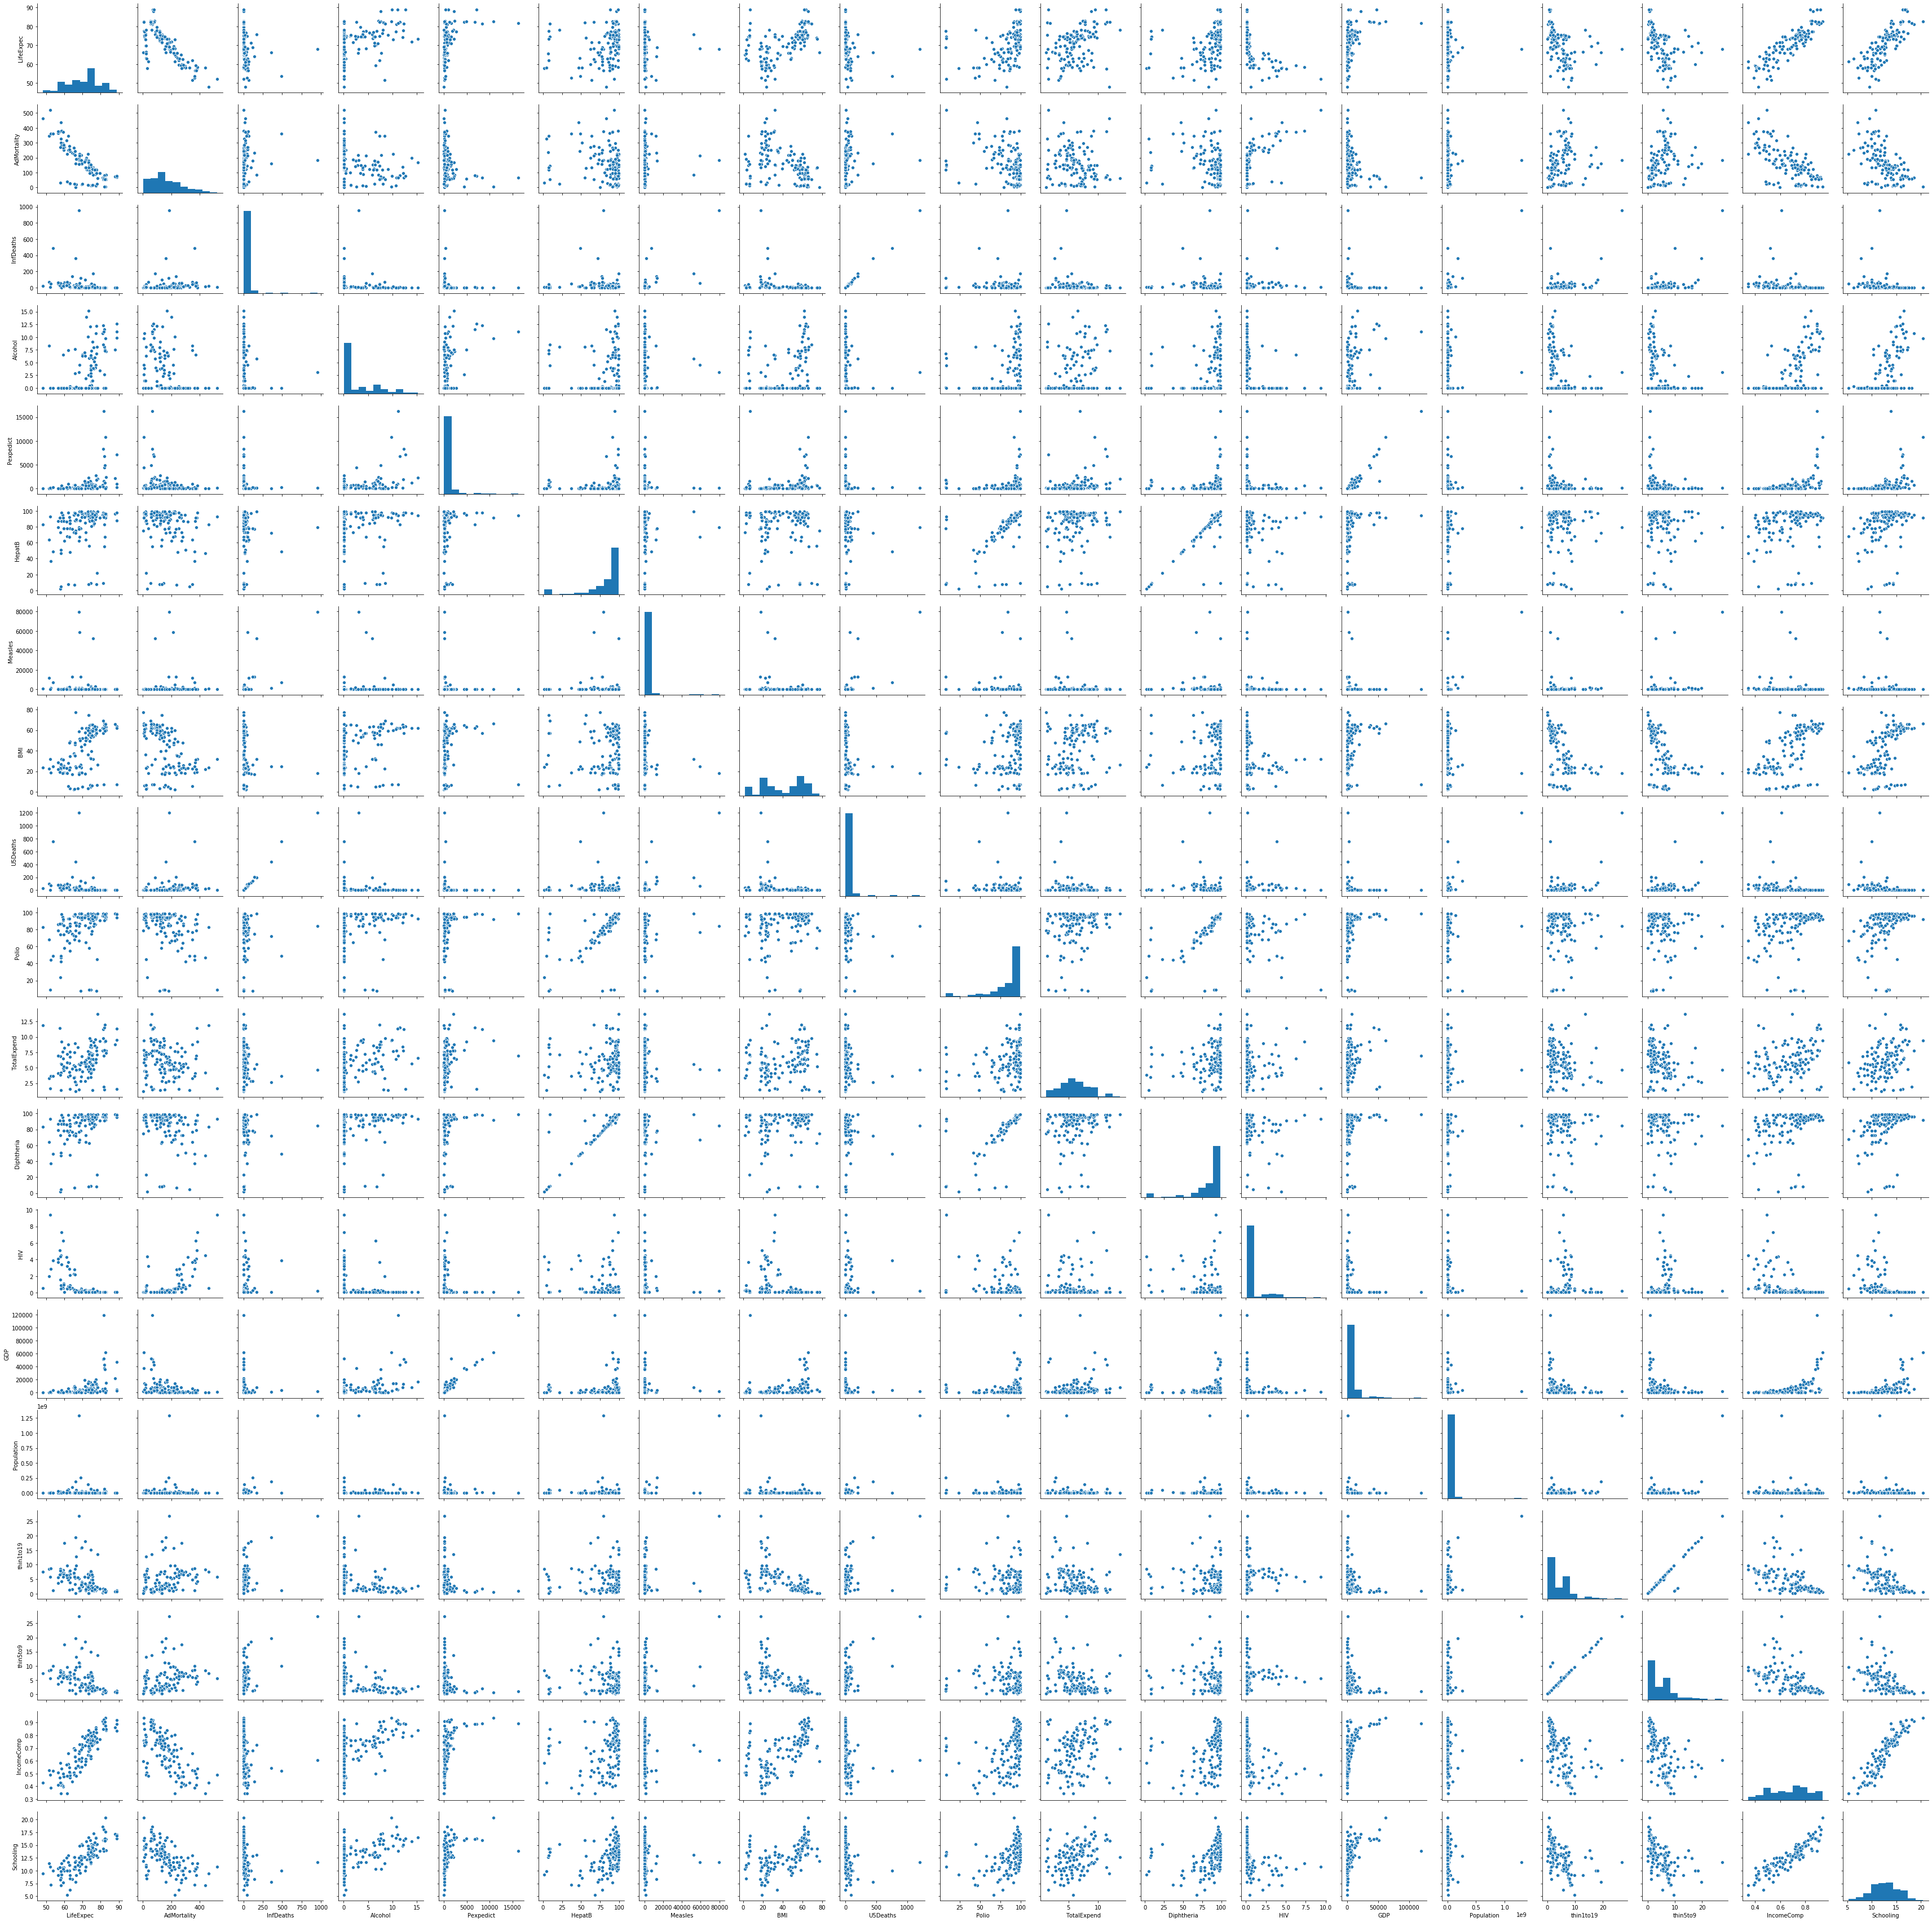

In [59]:
import seaborn as sns

# Mantém apenas as variáveis numéricas no 'data'
data = df.drop(['Country', 'Status'], axis=1).astype('float64')

# Constrói os gráficos de dispersão entre todos os pares de variáveis e faz os histogramas
sns.pairplot(data, diag_kind = "hist")
plt.show()

In [35]:
data.corr()

,LifeExpec,AdMortality,InfDeaths,Alcohol,Pexpedict,HepatB,Measles,BMI,U5Deaths,Polio,TotalExpend,Diphtheria,HIV,GDP,Population,thin1to19,thin5to9,IncomeComp,Schooling
LifeExpec,1.000000,-0.770069,-0.200942,0.529510,0.412596,0.252098,-0.048756,0.555226,-0.228570,0.385156,0.319311,0.342464,-0.617106,0.443771,-0.036031,-0.436944,-0.460959,0.892017,0.801796
AdMortality,-0.770069,1.000000,0.154287,-0.274181,-0.251888,-0.194356,0.049441,-0.399417,0.179067,-0.340702,-0.139523,-0.232559,0.650878,-0.284265,0.025903,0.264375,0.289728,-0.667555,-0.570878
InfDeaths,-0.200942,0.154287,1.000000,-0.094681,-0.097876,-0.086740,0.696491,-0.220816,0.995386,-0.125186,-0.152635,-0.091761,0.069255,-0.099156,0.848982,0.483707,0.546936,-0.194624,-0.211116
Alcohol,0.529510,-0.274181,-0.094681,1.000000,0.465352,0.080778,0.039480,0.366046,-0.104971,0.190882,0.270737,0.193975,-0.228370,0.446462,0.009682,-0.365997,-0.379598,0.611391,0.583659
Pexpedict,0.412596,-0.251888,-0.097876,0.465352,1.000000,0.107169,-0.071108,0.152046,-0.100324,0.140772,0.239184,0.136530,-0.140576,0.947421,-0.037973,-0.241918,-0.255424,0.445437,0.397964
HepatB,0.252098,-0.194356,-0.086740,0.080778,0.107169,1.000000,-0.022070,0.070813,-0.100129,0.649104,0.102112,0.891852,-0.182798,0.139520,-0.030984,-0.005622,-0.035887,0.216310,0.255166
Measles,-0.048756,0.049441,0.696491,0.039480,-0.071108,-0.022070,1.000000,-0.146417,0.665893,-0.038208,-0.099160,-0.026558,-0.054730,-0.052345,0.687827,0.262445,0.343426,-0.041279,-0.062640
BMI,0.555226,-0.399417,-0.220816,0.366046,0.152046,0.070813,-0.146417,1.000000,-0.230665,0.138221,0.160388,0.118856,-0.321547,0.192290,-0.120054,-0.534889,-0.575856,0.628802,0.555856
U5Deaths,-0.228570,0.179067,0.995386,-0.104971,-0.100324,-0.100129,0.665893,-0.230665,1.000000,-0.139574,-0.156598,-0.108469,0.094452,-0.102848,0.808718,0.462880,0.538105,-0.215791,-0.228967
Polio,0.385156,-0.340702,-0.125186,0.190882,0.140772,0.649104,-0.038208,0.138221,-0.139574,1.000000,0.237635,0.734660,-0.313947,0.176080,-0.066703,-0.055816,-0.080476,0.356371,0.363440


Pelos gráficos de dispersão e correlações acima, pode-se notar que algumas variáveis explicativas são bastante correlacionadas entre si.
Repare nas correlações e nos gráficos de Diphtheria x HepatB, thin1to10 x thin1to5, Income x Schooling, entre outros. Isto significa que tais variáveis dificilmente estarão simultaneamente no modelo final, pois haveria redundância e problema de multicolinearidade.

Outro destaque é que tem algumas variáveis preditoras que se comportam com um ou um grupo de valor(es) bem distantes dos demais. Talvez trabalhar com alguma transformação em algumas dessas variáveis melhore a relação com a resposta e, portanto, o processo de seleção de variáveis. Ou verificar, com a análise de resíduos, se há pontos detectados como outliers e, caso haja essa identificação, daí sim pensar em uma transformação de variáveis.
Veja as variáveis InfDeaths, Pexpedict, Measles, U5Deaths, GDP, Population, por exemplo

Usando a biblioteca 'mlxtend', iremos selecionar os preditores pelo método Forward, baseando-se no coeficiente de determinação do modelo.

In [49]:
#importing the necessary libraries
# talvez tenha que instalar mlxtend por Anaconda: conda install -c conda-forge mlxtend
# detalhes metodológicos em: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Seleção sequencial Forward (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,    # Especifica o número de vaiáveis no modelo final; pode-se rodar várias vezes, variando este número antes de chegar a um modelo final
           forward=True,
           floating=False,  # Se for igual a True, permite que uma variável que já entrou no modelo seja excluída posteriormente
           scoring = 'r2',  # Seleciona o índice para comparação dos modelos
           cv = 5)          # Esta opção permite a realização de crossvalidation

# Verifica se transformando algumas variáveis o resultado se altera
X_transf = X
X_transf.Population = np.log(X_transf.Population)
# Outras possíveis variáveis que necessitam de transformação: InfDeaths, Pexpedict, Measles, U5Deaths, GDP, Population
#sfs.fit(X_transf, y)

sfs.fit(X, y)
sfs.k_feature_names_     # solicita os nomes dos preditores que ficaram no modelo selecionado

('AdMortality', 'HepatB', 'TotalExpend', 'HIV', 'IncomeComp')

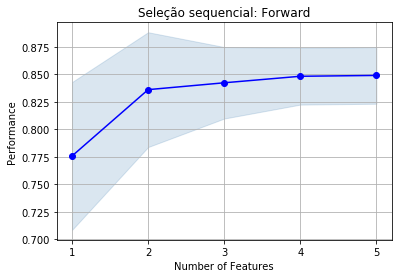

In [37]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Traz os detalhes da inclusão das variáveis no modelo; se houver cross-validation, insere a área sombreada
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Seleção sequencial: Forward')
plt.grid()
plt.show()

As variáveis selecionadas pelo método Forward foram 'AdMortality', 'TotalExpend', 'HIV', 'IncomeComp', quando solicitados 4 preditores no modelo final. Se 'k=5', a variável 'HepatB' é acrescentada ao modelo. Para verificar se mais preditores são estatisticamente significativos, pode-se aumentar o número de variáveis no modelo final para ver se (pelo p-valor, por exemplo) há necessidade de aumentarmos o número de preditores no modelo final.

A seguir, usaremos outro métdo de seleção: o melhor subconjunto, bseado no R2. 

In [41]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(LinearRegression(), 
           min_features=1, # Este é o número mínimo de preditores dos modelos estudados
           max_features=5, # Este é o número máximo de preditores dos modelos estudados
           scoring='r2',   # Este é o critério para comparação dos modelos 
           print_progress=True, 
           cv=0)

efs = efs.fit(X, y)

print('Melhor R2: %.2f' % efs.best_score_)
print('Melhor subconjunto de preditores (índices):', efs.best_idx_)
print('Melhor subconjunto de peditores (nomes):', efs.best_feature_names_)

Features: 12615/12615

Melhor R2: 0.88
Melhor subconjunto de preditores (índices): (0, 9, 10, 11, 16)
Melhor subconjunto de peditores (nomes): ('AdMortality', 'TotalExpend', 'Diphtheria', 'HIV', 'IncomeComp')


Repare que o melhor subconjunto de preditores gerou um R2 de 0.88 e tem quase as mesmas variáveis do que a seleção pelo método Forward. A diferença é que ao invés da HepatB, entrou Diphtheria. Mas lembre que estas duas variáveis eram bastante correlacionadas, segundo observado na análise descritiva.

In [42]:
# Visualiza os resultados da seleção
res_best = pd.DataFrame.from_dict(efs.get_metric_dict()).T
res_best.sort_values('avg_score', inplace=True, ascending=False)
res_best

C:\Users\Mariana\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Mariana\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
6305,0.875208,NaN,[0.8752080640883237],"(0, 9, 10, 11, 16)","(AdMortality, TotalExpend, Diphtheria, HIV, In...",0,NaN
5639,0.875081,NaN,[0.875081205012603],"(0, 4, 9, 11, 16)","(AdMortality, HepatB, TotalExpend, HIV, Income...",0,NaN
5353,0.874815,NaN,[0.8748154260503128],"(0, 3, 9, 11, 16)","(AdMortality, Pexpedict, TotalExpend, HIV, Inc...",0,NaN
6334,0.874644,NaN,[0.8746436164349569],"(0, 9, 11, 15, 16)","(AdMortality, TotalExpend, HIV, thin5to9, Inco...",0,NaN
6144,0.874459,NaN,[0.8744592611412706],"(0, 7, 9, 11, 16)","(AdMortality, U5Deaths, TotalExpend, HIV, Inco...",0,NaN
4989,0.874374,NaN,[0.8743737703285688],"(0, 2, 9, 11, 16)","(AdMortality, Alcohol, TotalExpend, HIV, Incom...",0,NaN
6325,0.87437,NaN,[0.8743696465283111],"(0, 9, 11, 12, 16)","(AdMortality, TotalExpend, HIV, GDP, IncomeComp)",0,NaN
6332,0.874347,NaN,[0.8743470006857832],"(0, 9, 11, 14, 16)","(AdMortality, TotalExpend, HIV, thin1to19, Inc...",0,NaN
4534,0.874308,NaN,[0.8743084089727093],"(0, 1, 9, 11, 16)","(AdMortality, InfDeaths, TotalExpend, HIV, Inc...",0,NaN
6336,0.874211,NaN,[0.8742109952254492],"(0, 9, 11, 16, 17)","(AdMortality, TotalExpend, HIV, IncomeComp, Sc...",0,NaN


In [44]:
# Ajustando o modelo selecionado pelo critério acima
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

mod = ols('df.LifeExpec ~ IncomeComp + Diphtheria + AdMortality + HIV + TotalExpend',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           df.LifeExpec   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.02e-54
Time:                        17:40:46   Log-Likelihood:                -331.03
No. Observations:                 131   AIC:                             674.1
Df Residuals:                     125   BIC:                             691.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.8753      2.161     21.688      

Como a variável Diphtheria é nao significativa, será excluída para apresentação do modelo (candidato) final. Após esta etapa, ainda será necessária a nálise dos resíduos para verificar se o modelo (candidato) final não viola nenhuma das suposições.

In [46]:
# Ajustando o modelo candidato a ser o modelo final
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

mod = ols('df.LifeExpec ~ IncomeComp + AdMortality + HIV + TotalExpend',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           df.LifeExpec   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.13e-55
Time:                        17:44:08   Log-Likelihood:                -331.62
No. Observations:                 131   AIC:                             673.2
Df Residuals:                     126   BIC:                             687.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.6141      2.048     23.253      

In [47]:
# Calcula o fator de inflação da variância para as variávis explicativas do modelo (VIF)
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(vif)

[57.09590438165842, 1.9159320718420896, 2.4357420982563953, 1.7449168726080462, 1.077254022523913]


O VIF está indicando existência de multicolinearidade. No entanto, não parece estar causando nenhuma incoerência no modelo: nem nos sinais das estimativas dos parâmetros de regressão, nem em seus erros padrão e, portanto, não irei modificar o modelo devido a isso. Agora, vamos realizar as análises de resíduos.

In [50]:
from scipy.stats import f

# valores preditos de E(Y)
ypred=res.fittedvalues

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,k) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Int64Index([107], dtype='int64') Int64Index([11], dtype='int64')


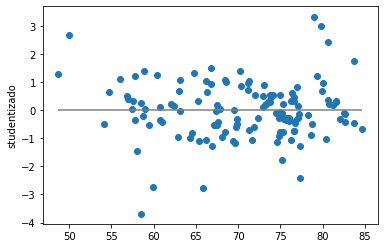

In [51]:
plt.scatter(ypred, res_stud)
plt.ylabel('studentizado')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
print(df.index[res_stud<-3],df.index[res_stud>3]) # identifica as observações mais críticas

Int64Index([], dtype='int64')


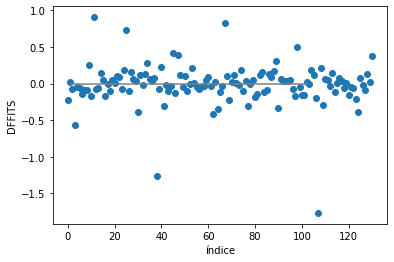

In [52]:
plt.scatter(df.index, dffits)
plt.ylabel('DFFITS')
plt.hlines(0,xmin=1,xmax=102,color='gray')
plt.xlabel('índice')
print(df.index[dffits>1]) # valores que estão acima de 1

Int64Index([], dtype='int64')


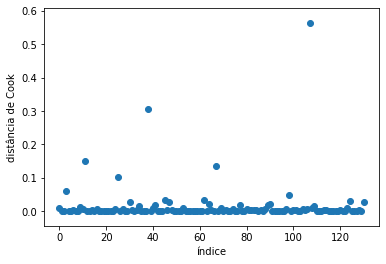

In [53]:
plt.scatter(df.index, cook)
plt.ylabel('distância de Cook')
plt.xlabel('índice')
print(df.index[cook>f.ppf(.5, 5, 126)]) # valores que estão acima do percentil 50 de uma distribuição F(p,n-p)

Int64Index([38, 67, 72, 107, 113, 124, 130], dtype='int64')


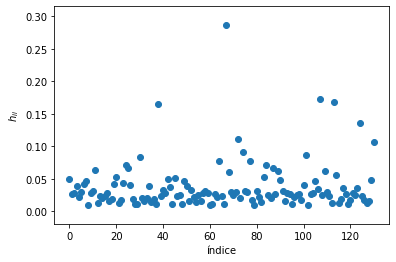

In [54]:
plt.scatter(df.index, hii)
plt.ylabel('$h_{ii}$')
plt.xlabel('índice')
print(df.index[hii>.1])   # h_ii>2p/n (neste caso, .1)

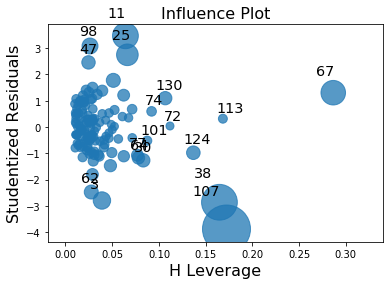

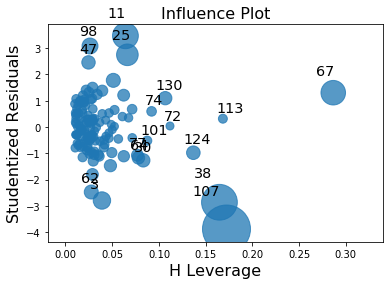

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Gráficos dos resíduos
sm.graphics.influence_plot(res)

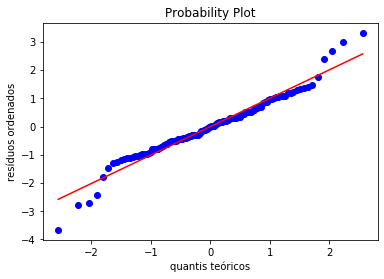

Int64Index([3, 38, 62, 107], dtype='int64') Int64Index([11, 25, 47, 98], dtype='int64')


In [58]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(res_stud, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()
print(df.index[res_stud<-2],df.index[res_stud>2])

As observações 11 107 estão com valores dos resíduos studentizados acima de 3, em módulo

Nenhuma observação foi apontada com uma distância de Cook grande demais (comparados com o percentil 50 de uma distribuição F (p,n-p)) e nem com dffits muito grandes (acima de 1).

Por hii, identificam-se as observações que são possíveis outliers em X (acima de 2p/n): 38, 67, 72, 107, 113, 124, 130

As observações com resíduos studentizados abaixo de -2 e acima de 2 parecem ser as responsáveis pela fuga da normalidade dos dados. Tais observações são: 3, 38, 62, 107 e 11, 25, 47, 98, respectivamente.

Contrastando os valores dos resíduos studentizados e o h_ii e considerando os resultados dos resíduos de maneira geral, pode-se interpretar que as observações 38, 67 e 107 são as que parecem mais problemáticas. Realizar o ajuste do modelo novamente sem essas observações e verificar se os resultados sofrem alterações importantes é aconselhável. 

Centralizando as variáveis preditoras, podemos interpretar o intercepto.

In [64]:
#data2 = df.drop(df.index[[38,67,107]])
IncomeComp_c = data.IncomeComp - np.mean(data.IncomeComp)
AdMortality_c = data.AdMortality - np.mean(data.AdMortality)
HIV_c = data.HIV - np.mean(data.HIV)
TotalExpend_c = data.TotalExpend - np.mean(data.TotalExpend)

mod = ols('data.LifeExpec ~ IncomeComp_c + AdMortality_c + HIV_c + TotalExpend_c',data=data)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:         data.LifeExpec   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.13e-55
Time:                        18:51:34   Log-Likelihood:                -331.62
No. Observations:                 131   AIC:                             673.2
Df Residuals:                     126   BIC:                             687.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        70.5198      0.271    260.225

As variáveis que mais influenciaram a expectativa de vida foram IDH (=IncomeComp), mortalidade em adultos (taxa por 1000 habitantes), óbitos por HIV por 1K habitantes (de 0-4 anos) e % do PIB gasto em saúde (=TotalExpend). 
A expectativa média de vida para países com mortalidade de adultos de 160 por 1K habitantes, 6% do PIB gasto com saúde, 0,8 crianças até 4 anos que morrem por HIV por 1K habitantes e IDH de 0,67 é igual a 70,5 anos.
A cada 0,1 aumentado no IDH (que é um índice que varia de 0 a 1), espera-se um aumento de 3,6 anos na expectativa de vida.
Um aumento de 100 óbitos de pessoas adultas por 1000 habitantes (ou seja, um aumento de 10% nos óbitos de adultos), diminui 2 anos a expectativa média de vida.
O aumento de 1 óbito infantil (de 0 a 4 anos) por HIV por 1K habitantes diminui a expectativa de vida em 0,8 anos.
O aumento de 1% do PIB gasto com saúde no país aumenta a expectativa média de vida em 0,36 anos.